In [1]:
%%capture --no-stderr
%pip install --quiet -U langchain_core langgraph langchain_google_genai serpapi tavily-python langchain_community langchain_groq langchain_openai

In [ ]:
from google.colab import userdata
google_api_key = userdata.get('GEMINI_API_KEY')


In [21]:
from google.colab import userdata
groq_api_key = userdata.get('GROQ_API_KET')
SERPAPI_API_KEY = userdata.get('SERPAPI_API_KEY')
open_api_key = userdata.get('OPENAI_API_KEY')

In [3]:
import os
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "langchain-academy"
os.environ["TAVILY_API_KEY"] = userdata.get("TAVILY_API_KEY")

In [ ]:
# from langchain_groq import ChatGroq
# llm = ChatGroq(
#     model="gemma2-9b-it",
#     max_retries=2,
#     api_key=groq_api_key
# )

# llm.invoke("greet me")

/usr/local/lib/python3.11/dist-packages/langsmith/client.py:253: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


AIMessage(content='Hello! 👋  How can I help you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 11, 'total_tokens': 26, 'completion_time': 0.027272727, 'prompt_time': 7.596e-05, 'queue_time': 0.023044297000000002, 'total_time': 0.027348687}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-3e09c77e-f830-4554-ba0e-202863efb04f-0', usage_metadata={'input_tokens': 11, 'output_tokens': 15, 'total_tokens': 26})

In [199]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o-mini", api_key=open_api_key)
llm.invoke("greet me")


AIMessage(content='Hello! How are you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 10, 'total_tokens': 18, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_bd83329f63', 'finish_reason': 'stop', 'logprobs': None}, id='run-a12e7f59-00ed-4222-8d72-7c75bb616bb0-0', usage_metadata={'input_tokens': 10, 'output_tokens': 8, 'total_tokens': 18, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [ ]:
# from langchain_core.messages import AIMessage, HumanMessage, SystemMessage,ToolMessage
# from langchain_google_genai import ChatGoogleGenerativeAI
# llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(model="gemini-1.5-flash", api_key=google_api_key)
# messages = [HumanMessage(content="What is your name?")]
# result = llm.invoke(messages)
# print(result)


content="I don't have a name. I am a large language model, trained by Google." additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []} id='run-8404c701-7bf2-4d8e-9595-20632a226146-0' usage_metadata={'input_tokens': 6, 'output_tokens': 20, 'total_tokens': 26, 'input_token_details': {'cache_read': 0}}


In [ ]:
# from langgraph.graph import MessagesState
# from typing import TypedDict, List, Annotated, Union
# from langchain_core.messages import AIMessage, HumanMessage, SystemMessage,ToolMessage
# import operator
# class AgentState(TypedDict):
#     messages: Annotated[List[Union[HumanMessage, AIMessage, SystemMessage]], operator.add]
#     # budget: float
#     # interests: List[str]
#     # companions: int
#     # city: str
#     # days: int
#     # travel_date: str
#     # itinerary: List[dict]  # To store the final itinerary


In [200]:
from langgraph.graph import MessagesState
from typing import TypedDict, List, Annotated, Union
class AgentState(MessagesState):
    # pass
    # messages: Annotated[List[Union[HumanMessage, AIMessage, SystemMessage]], operator.add]
    budget: float
    interests: List[str]
    companions: int
    city: List[str]
    days: int
    travel_date: str
    itinerary: List[dict]  # To store the final itinerary


In [6]:
# def get_system_prompt(state: AgentState):
#     return f"""You are a smart travel assistant. Create a detailed itinerary in JSON format considering:
#     - Budget: ${state['budget']}
#     - Travel Interests: {', '.join(state['interests'])}
#     - Companions: {state['companions']} people
#     - Destination: {state['city']}
#     - Duration: {state['days']} days
#     - Travel Date: {state['travel_date']}

#     Use the hotels_finder tool to get hotel images and information.Use the image_finder tool to get high-quality images for Destination:{state['city']}.


#     The response should be a valid JSON object with the following structure:
#     {{
#         "trip_details": {{
#             "destination": string,
#             "duration": number,
#             "travel_date": string,
#             "companions": number,
#             "budget": number,
#             "interests": string[]
#         }},

#         "destination_images": [
#             {{
#                 "url": string,
#             }}
#         ],

#         "daily_itinerary": [
#             {{
#                 "day": number,
#                 "date": string,
#                 "day_title": string,  # e.g., "Cultural Tour", "Arrival Day", "Adventure Day"
#                 "description": string,  # Brief description of the day's theme and activities
#                 "hotel": {{
#                     "name": string,
#                     "price": number,
#                     "rating": number,
#                     "reviews": number,
#                     "image_url": string,
#                     "hotel_images": [
#                            {{
#                               "url": string,
#                            }}
#                     ],
#                     "booking_url": string
#                 }},
#                 "transportation": {{
#                     "type": string,
#                     "cost": number
#                 }},
#                 "meals": [
#                     {{
#                         "type": string,
#                         "venue": string,
#                         "cost": number
#                     }}
#                 ],
#                 "activities": [
#                     {{
#                         "name": string,
#                         "description": string,
#                         "cost": number,
#                     }}
#                 ],

#             }}
#         ],

#             "total_cost": number,
#             "remaining_budget": number
#         }}
#     }}

#     Instructions:
#     1. Use image_finder to get 8-10 high-quality images of destination:{state['city']}.
#     2. Include these images in the destination_images array
#     3. Include these images in the hotel_images array
#     4. Ensure all image URLs are valid and accessible

#     For each day:
#     1. Provide a meaningful day_title that describes the theme (e.g., "Cultural Tour", "Adventure Day")
#     2. Include a brief description explaining the day's focus and highlights


#     In the cost_summary:
#     1. Calculate the total trip cost
#     2. Show the remaining budget from the original amount
#     """

In [201]:
def get_system_prompt(state: AgentState):
    return f"""You are a smart travel assistant. Create a detailed itinerary in JSON format considering:
    - Budget: PKR {state['budget']}
    - Travel Interests: {', '.join(state['interests'])}
    - Companions: {state['companions']} people
    - Destination: {state['city']}
    - Duration: {state['days']} days
    - Travel Date: {state['travel_date']}

    Use the hotels_finder tool to get hotel images and information. Use the image_finder tool to get high-quality images for Destination:{state['city']}.

    The response should be a valid JSON object with the following structure:
    {{
        "trip_details": {{
            "destination": string,
            "duration": number,
            "travel_date": string,
            "companions": number,
            "budget": number,  # in PKR
            "interests": string[]
        }},

        "destination_images": [
            {{
                "url": string,
            }}
        ],

        "hotel_images": [
                           {{
                              "url": string,
                           }}
        ],

        "daily_itinerary": [
            {{
                "day": number,
                "date": string,
                "day_title": string,  # e.g., "Cultural Tour", "Arrival Day", "Adventure Day"
                "description": string,  # Brief description of the day's theme and activities
                "hotel": {{
                    "name": string,
                    "price": number,  # in PKR
                    "rating": number,
                    "reviews": number,
                    "booking_url": string
                }},
                "transportation": {{
                    "type": string,
                    "cost": number  # in PKR
                }},
                "meals": [
                    {{
                        "type": string,
                        "venue": string,
                        "cost": number  # in PKR
                    }}
                ],
                "activities": [
                    {{
                        "name": string,
                        "description": string,
                        "cost": number,  # in PKR
                    }}
                ],
            }}
        ],

        "total_cost": number,  # in PKR
        "remaining_budget": number  # in PKR
    }}

    Instructions:
    1. Use image_finder to get 8-10 high-quality images of destination:{state['city']}.
    2. Include destination images in the destination_images array
    3. Include hotel images in the hotel_images array
    4. Ensure all image URLs are valid and accessible

    For each day:
    1. Provide a meaningful day_title that describes the theme (e.g., "Cultural Tour", "Adventure Day")
    2. Include a brief description explaining the day's focus and highlights


    In the cost_summary:
    1. Calculate the total trip cost in PKR
    2. Show the remaining budget from the original amount in PKR
    """

In [202]:
from langchain_core.tools import tool

from typing import Optional

from pydantic import BaseModel, Field
import serpapi
# from langchain.pydantic_v1 import BaseModel, Field
from langchain_core.tools import tool

class HotelsInput(BaseModel):
    q: str = Field(description='Location of the hotel')
    check_in_date: str = Field(description='Check-in date. The format is YYYY-MM-DD. e.g. 2024-06-22')
    check_out_date: str = Field(description='Check-out date. The format is YYYY-MM-DD. e.g. 2024-06-28')
    sort_by: Optional[str] = Field(8, description='Parameter is used for sorting the results. Default is sort by highest rating')
    adults: Optional[int] = Field(1, description='Number of adults. Default to 1.')
    children: Optional[int] = Field(0, description='Number of children. Default to 0.')
    rooms: Optional[int] = Field(1, description='Number of rooms. Default to 1.')
    hotel_class: Optional[str] = Field(
        None, description='Parameter defines to include only certain hotel class in the results. for example- 2,3,4')


class HotelsInputSchema(BaseModel):
    params: HotelsInput


@tool(args_schema=HotelsInputSchema)
def hotels_finder(params: HotelsInput):
    '''
    Find hotels using the Google Hotels engine.

    Returns:
        dict: Hotel search results.
    '''
    print(f"calling...")



    params = {
        'api_key': SERPAPI_API_KEY,
        'engine': 'google_hotels',
        'hl': 'en',
        'gl': 'pk',
        'q': params.q,
        'check_in_date': params.check_in_date,
        'check_out_date': params.check_out_date,
        'currency': 'PKR',
        'adults': params.adults,
        'children': params.children,
        'rooms': params.rooms,
        'sort_by': params.sort_by,
        'hotel_class': params.hotel_class
    }
    print(f"calling again...")

    search = serpapi.search(params)
    results = search.data
    print(f"hotels results",results)
    return results['properties'][:5]




In [203]:
# Define the input model without nesting
class ImageSearchInput(BaseModel):
    q: str = Field(description="Search query for the image")
    safe: Optional[str] = Field(default="active", description="Safe search setting: active, moderate, or off")

# Define the tool without using args_schema
@tool
def image_finder(q: str, safe: str = "active") -> list:
    '''
    Find images using Google Images via SerpAPI.
    Args:
        q: Search query for the image
        safe: Safe search setting (active, moderate, or off)
    Returns:
        list: List of image results with URLs and metadata
    '''
    search_params = {
        "api_key": SERPAPI_API_KEY,
        "engine": "google_images",
        "q": q,
        "safe": safe,
        "hl": "en",
        "gl": "pk",
    }

    search = serpapi.search(search_params)
    results = search.data
    return results["images_results"][:10]

In [60]:
# from pydantic import BaseModel, Field
# from typing import Optional, List





# # Define Pydantic Models
# class ImageSearchInput(BaseModel):
#     q: str = Field(description="Search query for the image")
#     num: Optional[int] = Field(10, description="Number of images to return. Default is 10.")
#     safe: Optional[str] = Field("active", description="Safe search setting: active, moderate, or off")


# class ImageSearchInputSchema(BaseModel):
#     params: ImageSearchInput


# # Define Image Search Function
# def image_finder(params: ImageSearchInput) -> List[dict]:
#     """
#     Find images using Google Images via SerpAPI.
#     Returns a list of image results with URLs and metadata.
#     """
#     search_params = {
#         "api_key": SERPAPI_API_KEY,
#         "engine": "google_images",
#         "q": params.q,
#         "num": params.num,
#         "safe": params.safe,
#         "hl": "en",
#         "gl": "pk",
#     }

#     search = serpapi.search(search_params)
#     results = search.data

#     if "images_results" in results:
#         images = results["images_results"]
#         processed_results = [
#             {
#                 "original": img.get("original", ""),
#                 "thumbnail": img.get("thumbnail", ""),
#                 "title": img.get("title", ""),
#                 "source": img.get("source", ""),
#                 "width": img.get("original_width", 0),
#                 "height": img.get("original_height", 0),
#             }
#             for img in images[:params.num]  # Limit results here as well
#         ]
#         return processed_results

#     return []

# if __name__ == "__main__":
#     # Define input parameters
#     search_input = ImageSearchInput(q="Skardu", num=10, safe="active")

#     # Call the function and get image results
#     image_results = image_finder(search_input)

#     # Print results
#     print(f"Number of images found: {len(image_results)}")
#     for i, img in enumerate(image_results, 1):
#         print(f"\nImage {i}:")
#         print(f"Title: {img['title']}")
#         print(f"URL: {img['original']}")

Number of images found: 10

Image 1:
Title: Skardu - Wikipedia
URL: https://upload.wikimedia.org/wikipedia/commons/9/9f/Shangrila_resort_skardu.jpg

Image 2:
Title: The Enchanting Beauty of Skardu Valley
URL: https://thefridaytimes.com/digital_images/large/2024-09-03/shangrila-resorts-in-kachura-valley-1725345342-2251.jpg

Image 3:
Title: 13 Best Things to do in Skardu 2025 ...
URL: https://clickpakistan.org/wp-content/uploads/2023/11/Best-Things-to-do-in-Skardu.jpg

Image 4:
Title: Skardu: An embodiment of nature's ...
URL: https://i.dawn.com/primary/2015/04/552534a77b507.jpg?r=961640394

Image 5:
Title: Explore the Top 15 Iconic Places in Skardu
URL: https://res.cloudinary.com/dc60xb6rg/images/f_auto,q_auto/v1698065121/Skardu/Skardu.jpg?_i=AA

Image 6:
Title: Lakes in Skardu Baltistan: Fresh ...
URL: https://balti.pk/wp-content/uploads/2024/04/Kachura-Lake-Skardu.jpg

Image 7:
Title: in Skardu Gilgit Baltistan ...
URL: https://gilgitbaltistandiscoveries.com/wp-content/uploads/2024/03

In [ ]:
# from langchain_google_genai import ChatGoogleGenerativeAI

# def multiply(a: int, b: int) -> int:
#     """Multiply a and b.

#     Args:
#         a: first int
#         b: second int
#     """
#     return a * b

# # This will be a tool
# def add(a: int, b: int) -> int:
#     """Adds a and b.

#     Args:
#         a: first int
#         b: second int
#     """
#     return a + b

# def divide(a: int, b: int) -> float:
#     """Divide a and b.

#     Args:
#         a: first int
#         b: second int
#     """
#     return a / b

# tools = [add, multiply, divide]
# llm_with_tools = llm.bind_tools(tools)

In [204]:
# from langchain_community.tools.tavily_search import TavilySearchResults
# from pydantic import BaseModel



# tool = TavilySearchResults(max_results=2)
tools = [hotels_finder,image_finder]
llm_with_tools = llm.bind_tools(tools)

In [205]:
llm_with_tools

RunnableBinding(bound=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7dcb9ce06dd0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7dcbb0546410>, root_client=<openai.OpenAI object at 0x7dcb9cde0a50>, root_async_client=<openai.AsyncOpenAI object at 0x7dcb9cecbc50>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'hotels_finder', 'description': 'Find hotels using the Google Hotels engine.\n\nReturns:\n    dict: Hotel search results.', 'parameters': {'properties': {'params': {'properties': {'q': {'description': 'Location of the hotel', 'type': 'string'}, 'check_in_date': {'description': 'Check-in date. The format is YYYY-MM-DD. e.g. 2024-06-22', 'type': 'string'}, 'check_out_date': {'description': 'Check-out date. The format is YYYY-MM-DD. e.g. 2024-06-28', 'type': 'string'}, 'sort_by': {'anyOf': [{'type': 'string'}, {'type': 'null'}],

In [69]:
llm_with_tools.kwargs

{'tools': [{'type': 'function',
   'function': {'name': 'hotels_finder',
    'description': 'Find hotels using the Google Hotels engine.\n\nReturns:\n    dict: Hotel search results.',
    'parameters': {'properties': {'params': {'properties': {'q': {'description': 'Location of the hotel',
         'type': 'string'},
        'check_in_date': {'description': 'Check-in date. The format is YYYY-MM-DD. e.g. 2024-06-22',
         'type': 'string'},
        'check_out_date': {'description': 'Check-out date. The format is YYYY-MM-DD. e.g. 2024-06-28',
         'type': 'string'},
        'sort_by': {'anyOf': [{'type': 'string'}, {'type': 'null'}],
         'default': 8,
         'description': 'Parameter is used for sorting the results. Default is sort by highest rating'},
        'adults': {'anyOf': [{'type': 'integer'}, {'type': 'null'}],
         'default': 1,
         'description': 'Number of adults. Default to 1.'},
        'children': {'anyOf': [{'type': 'integer'}, {'type': 'null'}],
  

In [206]:
from langgraph.graph import MessagesState
from langchain_core.messages import HumanMessage, SystemMessage
import datetime
import operator

CURRENT_YEAR = datetime.datetime.now().year

# sys_msg = SystemMessage(content=get_system_prompt(state))
def assistant(state: AgentState)->AgentState:
    system_prompt = SystemMessage(content=get_system_prompt(state))
    # messages = [system_prompt] + state['messages']
    # # messages = state['messages']
    # response = llm_with_tools.invoke(messages)
    # # response = llm.invoke(messages)
    # return {"messages": [response]}
    print("state",[system_prompt] + state["messages"])
    return {"messages": [llm_with_tools.invoke([system_prompt] + state["messages"])]}


# # Node
# def assistant(state: AgentState) -> AgentState:
#    return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}

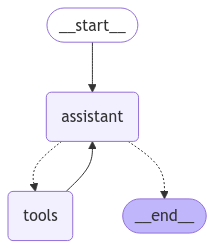

In [207]:
from langgraph.graph import START, StateGraph
from langgraph.prebuilt import tools_condition
from langgraph.prebuilt import ToolNode
from IPython.display import Image, display
from langgraph.graph.state import CompiledStateGraph

# Graph
builder: StateGraph = StateGraph(AgentState)

# Define nodes: these do the work
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

# Define edges: these determine how the control flow moves
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "assistant")
react_graph: CompiledStateGraph = builder.compile()

# Show
display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))

In [211]:
initial_state = {
    "messages": [HumanMessage(content="Plan my trip to Pakistan")],
    "budget": 5000.0,
    "interests": ["sightseeing", "local cuisine"],
    "companions": 2,
    "city": ["Skardu", "Hunza"],
    "days": 7,
    "travel_date": "2025-10-03",
    "itinerary": []
}


In [212]:
config1 = {"configurable": {"thread_id": "1"}}

In [213]:
# Specify an input
# messages = [HumanMessage(content="Plan my trip to Pakistan")]

# Run
messages = react_graph.invoke(initial_state,config1)
print("\n[FINAL RESPONSE]\n",messages)
for m in messages['messages']:
    m.pretty_print()

state [SystemMessage(content='You are a smart travel assistant. Create a detailed itinerary in JSON format considering:\n    - Budget: PKR 5000.0\n    - Travel Interests: sightseeing, local cuisine\n    - Companions: 2 people\n    - Destination: [\'Skardu\', \'Hunza\']\n    - Duration: 7 days\n    - Travel Date: 2025-10-03\n\n    Use the hotels_finder tool to get hotel images and information. Use the image_finder tool to get high-quality images for Destination:[\'Skardu\', \'Hunza\'].\n   \n    The response should be a valid JSON object with the following structure:\n    {\n        "trip_details": {\n            "destination": string,\n            "duration": number,\n            "travel_date": string,\n            "companions": number,\n            "budget": number,  # in PKR\n            "interests": string[]\n        },\n\n        "destination_images": [ \n            {\n                "url": string,\n            }\n        ],\n\n        "hotel_images": [ \n                        

/usr/local/lib/python3.11/dist-packages/pydantic/main.py:426: UserWarning: Pydantic serializer warnings:
  Expected `str` but got `int` with value `8` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(


calling...
calling again...
calling...
calling again...


hotels results {'search_metadata': {'id': '67a917f51f4ff4ca55f7cd24', 'status': 'Success', 'json_endpoint': 'https://serpapi.com/searches/a5ddc07c3bf6eb8b/67a917f51f4ff4ca55f7cd24.json', 'created_at': '2025-02-09 21:02:45 UTC', 'processed_at': '2025-02-09 21:02:45 UTC', 'google_hotels_url': 'https://www.google.com/_/TravelFrontendUi/data/batchexecute?rpcids=AtySUc&source-path=/travel/search&hl=en&gl=pk&rt=c&soc-app=162&soc-platform=1&soc-device=1', 'raw_html_file': 'https://serpapi.com/searches/a5ddc07c3bf6eb8b/67a917f51f4ff4ca55f7cd24.html', 'prettify_html_file': 'https://serpapi.com/searches/a5ddc07c3bf6eb8b/67a917f51f4ff4ca55f7cd24.prettify', 'total_time_taken': 0.96}, 'search_parameters': {'engine': 'google_hotels', 'q': 'Hunza', 'gl': 'pk', 'hl': 'en', 'currency': 'PKR', 'check_in_date': '2025-10-03', 'check_out_date': '2025-10-10', 'adults': 2, 'children': 0, 'sort_by': '8'}, 'search_information': {'total_results': 106}, 'properties': [{'type': 'hotel', 'name': 'Offto Resort Kari


[FINAL RESPONSE]
 {'messages': [HumanMessage(content='Plan my trip to Pakistan', additional_kwargs={}, response_metadata={}, id='a8e98230-144f-4c9c-bc8e-1233532ca253'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_TsCHyx6fjZcxmCwaR4defuMY', 'function': {'arguments': '{"q": "Skardu", "safe": "active"}', 'name': 'image_finder'}, 'type': 'function'}, {'id': 'call_tzZDl1IxTheSKALNGdD57UWs', 'function': {'arguments': '{"q": "Hunza", "safe": "active"}', 'name': 'image_finder'}, 'type': 'function'}, {'id': 'call_wTvCkpCPkRbJ3smtX73A0J3I', 'function': {'arguments': '{"params": {"q": "Skardu", "check_in_date": "2025-10-03", "check_out_date": "2025-10-10", "adults": 2}}', 'name': 'hotels_finder'}, 'type': 'function'}, {'id': 'call_CGhW3AAQ72ctT6NVpg0pFwv3', 'function': {'arguments': '{"params": {"q": "Hunza", "check_in_date": "2025-10-03", "check_out_date": "2025-10-10", "adults": 2}}', 'name': 'hotels_finder'}, 'type': 'function'}], 'refusal': None}, response_metadata={

In [ ]:
print("\n[FINAL RESPONSE]\n",messages)


[FINAL RESPONSE]
 {'messages': [HumanMessage(content='Plan my trip to Pakistan', additional_kwargs={}, response_metadata={}, id='ae2cce99-88d3-4f20-bbd0-a8096d365e30'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_V1XnBdTXIp5rxifurzGLKKhr', 'function': {'arguments': '{"params": {"q": "Skardu", "check_in_date": "2025-10-03", "check_out_date": "2025-10-10", "adults": 2}}', 'name': 'hotels_finder'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 64, 'prompt_tokens': 366, 'total_tokens': 430, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_72ed7ab54c', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-5a0f212a-c209-4a53-b265-66c16c952a77-0', tool_calls=[{'name': 'hotels_finder', 'args': {'

In [ ]:
# from langchain_core.messages import AIMessage, HumanMessage, SystemMessage,ToolMessage
# from langgraph.prebuilt import tools_condition, ToolNode
# from langgraph.graph import StateGraph, END ,START
# from IPython.display import display, Image
# from langgraph.checkpoint.memory import MemorySaver
# from langgraph.graph.state import CompiledStateGraph
# from langgraph.graph import MessagesState

# def assistant(state: MessagesState)->MessagesState:
#     # system_prompt = SystemMessage(content=get_system_prompt(state))
#     # messages = [system_prompt] + state['messages']
#     messages = state['messages']
#     response = llm_with_tools.invoke(messages)
#     # response = llm.invoke(messages)
#     return {"messages": [response]}

# # # New itinerary creation node
# # def create_itinerary(state: AgentState):
# #     # Parse tool responses and format itinerary
# #     itinerary = []
# #     tool_results = [msg.content for msg in state['messages'] if isinstance(msg, ToolMessage)]

# #     # Create structured itinerary (simplified example)
# #     itinerary_entry = {
# #         "city": state['city'],
# #         "days": state['days'],
# #         "daily_plan": [],
# #         "total_estimated_cost": state['budget']
# #     }

# #     # Add parsed tool data to itinerary
# #     for result in tool_results:
# #         if 'hotels' in result:
# #             itinerary_entry['hotels'] = result['hotels'][:3]  # Top 3 hotels

# #     return {"itinerary": [itinerary_entry], "messages": [AIMessage(content="Itinerary created!")]}

# # Modified graph construction
# builder = StateGraph(MessagesState)
# builder.add_node("assistant", assistant)
# builder.add_node("tools", ToolNode([tools]))  # Add other tools as needed
# # builder.add_node("create_itinerary", create_itinerary)

# # Edge connections
# builder.add_edge(START, "assistant")
# builder.add_conditional_edges(
#     "assistant",
#     # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
#     # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
#     tools_condition,
# )
# # builder.add_conditional_edges(
# #     "assistant",
# #     tools_condition,
# #     {
# #         "call_tools": "tools",
# #         "continue": "create_itinerary"
# #     }
# # )
# builder.add_edge("tools", "assistant")




# memory: MemorySaver = MemorySaver()
# graph: CompiledStateGraph = builder.compile( checkpointer=memory)

# # Show
# display(Image(graph.get_graph(xray=True).draw_mermaid_png()))


In [ ]:
messages = graph.invoke({"messages": messages},config1)
for m in messages['messages']:
    m.pretty_print()

In [ ]:
result = graph.invoke(
    initial_state,
    config1
)

ERROR:grpc._plugin_wrapping:AuthMetadataPluginCallback "<google.auth.transport.grpc.AuthMetadataPlugin object at 0x79cc890d4e10>" raised exception!
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/google/auth/compute_engine/credentials.py", line 128, in refresh
    self._retrieve_info(request)
  File "/usr/local/lib/python3.11/dist-packages/google/auth/compute_engine/credentials.py", line 101, in _retrieve_info
    info = _metadata.get_service_account_info(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/google/auth/compute_engine/_metadata.py", line 323, in get_service_account_info
    return get(request, path, params={"recursive": "true"})
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/google/auth/compute_engine/_metadata.py", line 248, in get
    raise exceptions.TransportError(
google.auth.exceptions.TransportError: ("Failed to retrieve http:

KeyboardInterrupt: 